# Didge Lab Tutorial - Part 1

This tutorial explains

* Basic didgeridoo geometry
* Visualizing the geometry
* Acoustical Simulation
* Conversion Toolkit

First we do some magic so we can import the didgelab source codes from this folder. You can easily ignore the first code cell.

In [1]:
import sys
sys.path.append('../../')

## Create a didgeridoo geometry

The Didgeridoo geometry is a list of segments. Each segment is a 2d list with an x coordinate (distance from mouth piece in mm) and a y coordinate (diameter of the bore at point x in mm).

The Geo class wraps this array and provides some utility functions. Inside of didgelab source code you will hardly find the geometry list itself, it uses mostly the Geo class.

In [2]:
from cad.calc.geo import Geo
geo = [[0,32], [800,32], [900,38], [970,42], [1050, 40], [1180, 48], [1350, 60], [1390, 68], [1500, 72]]
geo = Geo(geo)

Some information about the didgeridoo you can read directly from the segments:

In [3]:
geo_list = geo.geo
print("mouthpiece diameter in mm:", geo_list[0][1])
print("didgeridoo length in mm:", geo_list[-1][0])

mouthpiece diameter in mm: 32
didgeridoo length in mm: 1500


## Visualize didgeridoo form

Lets start with a simple helper method. We visualize the didgeridoo. This is a plot of the inner shape of the didgeridoo. 

<AxesSubplot: xlabel='x', ylabel='y'>

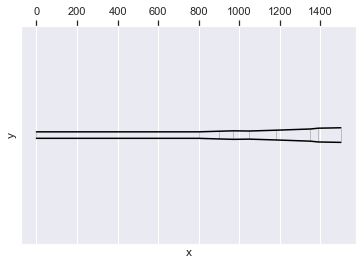

In [4]:
from cad.ui.visualization import DidgeVisualizer
DidgeVisualizer.vis_didge(geo)

# Acoustical Simulation

## Impedance Spektrum

First we visualize the impedance spektrum of the didgeridoo geometry.

The impedance spektrum shows the acoustical impedance of the didgeridoo over a frequency spektrum. The peaks of the graph are the resonant frequencies of the didgeridoo. This example here has a resonant frequency around 70 Hz, which is the frequency of the drone of this didgeridoo. It has other peaks around 190 and 300 Hz, which are the first two overblows. There are more peaks at higher frequencies, but they are very low and therefore cannot be played.

The method cadsd.get_impedance_spektrum() returns a pandas dataframe. We then use the seaborn library to draw a line chart from this pandas dataframe.

<AxesSubplot: xlabel='freq', ylabel='impedance'>

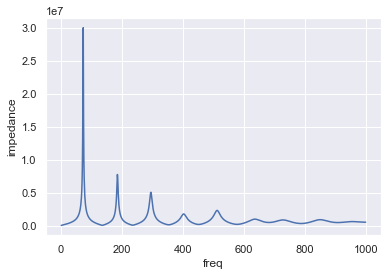

In [5]:
from cad.cadsd.cadsd import CADSD
import seaborn as sns

cadsd = CADSD(geo)
impedance_spectrum=cadsd.get_impedance_spektrum()
sns.lineplot(data=impedance_spectrum, x="freq", y="impedance")

Next we print a tabular representation of the impedance spektrum. This shows all the maxima (the peaks) of the impedance spektrum. In this representation we can see the exact frequencies of the resonant peaks.

The columns are

* first columnn is an internal index, you can ignore it.
* freq: the frequency of the impedance peak
* impedance: the impedance
* rel_imp: The relative impedance. This is the impedance, divided by the maximum impedance. This number is easier to grasp than the total impedance. A relative impedance below 0.1 means that this peak is very hard or impossible to play.
* note-number: This is the internal note number. The software uses a note numbering system. D1 is -31, D#1 is -30, and so on. This system is unfortunately kind of random, it does not follow any standard. I implemented it in an early stage of the software and never changed it.
* cent-diff: The difference in cent from the note
* note-name: The note-number in standard notation.

In [6]:
cadsd.get_notes()

,freq,impedance,rel_imp,note-number,cent-diff,note-name
1715,72.7,3.185908e+07,1.000000,-31,16.971505,D1
184,185.0,7.729043e+06,0.242601,-15,-0.026096,F#2
294,295.0,5.042328e+06,0.158270,-7,-7.853717,D3
401,402.0,1.748191e+06,0.054873,-2,-43.630373,G3
511,512.0,2.287785e+06,0.071810,3,37.631656,C4
635,636.0,9.630371e+05,0.030228,6,-37.827890,D#4
727,728.0,8.437544e+05,0.026484,9,28.278088,F#4
849,850.0,8.842669e+05,0.027756,11,-39.951181,G#4
955,956.0,5.949348e+05,0.018674,13,-43.408513,A#5
998,999.0,5.007546e+05,0.015718,14,-19.577385,B5


## Plotting the ground tone and 1st overtone sound spektra

Here we plot the sound spektra of the ground tone (drone) and the 1st overblow of this didgeridoo. This chart gives an idea of how the didgeridoo sounds like. One can see the sound volume for the different frequencies.

[Text(0.5, 1.0, 'ground sound spektrum'), Text(0, 0.5, 'volume')]

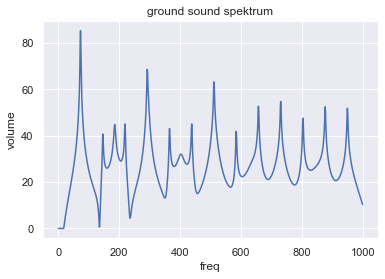

In [7]:
spektra=cadsd.get_all_spektra_df()
sns.lineplot(data=spektra, x="freq", y="ground").set(title="ground sound spektrum", ylabel="volume")

[Text(0.5, 1.0, 'overblow sound spektrum'), Text(0, 0.5, 'volume')]

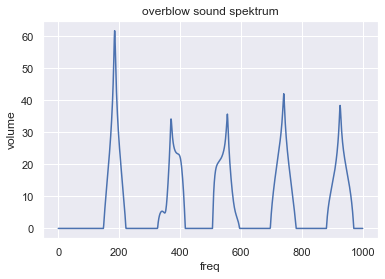

In [8]:
spektra=cadsd.get_all_spektra_df()
sns.lineplot(data=spektra, x="freq", y="overblow").set(title="overblow sound spektrum", ylabel="volume")

## Conversion Toolkit

Didgelab has a toolkit for the conversion between notes, frequencies and such. Internally it uses a note numbering system in which A4 (440 Hz) is note 0. Note 1 is A#4, 2 is B, -1 is G#4, ...

* note_to_freq converts a note number to its frequency
* freq_to_note converts a frequency to its (closest) note number
* freq_to_note_and_cent converts a frequency to its (closest) note number and the offset in cent from this note
* note_name converts a note number to its note name
* freq_to_wavelength converts a frequency to its wavelength (in mm)

In [9]:
from cad.calc.conv import note_to_freq, freq_to_note, note_name, freq_to_note_and_cent, freq_to_wavelength

freq = 220

print("frequency:", freq)
note = freq_to_note(freq)
print("note number:", note)
print("note name:", note_name(note))
print("wave length:", freq_to_wavelength(freq))


frequency: 220
note number: -12.0
note name: A3
wave length: 1560.0


Next we make a reference table notes over 4 octacves. We use the pandas library to draw a nice table.

In [10]:
import pandas as pd
start_note = -40
df = []
for note in range(start_note, start_note + 12*4, 1):
    row = [
        note,
        note_name(note),
        note_to_freq(note),
        freq_to_wavelength(note_to_freq(note))
    ]
    df.append(row)
df=pd.DataFrame(df, columns=["note number", "note name", "frequency", "wavelength"])
df

,note number,note name,frequency,wavelength
0,-40,F0,43.653529,7861.907351
1,-39,F#0,46.249303,7420.652398
2,-38,G0,48.999429,7004.163181
3,-37,G#0,51.913087,6611.049709
4,-36,A1,55.000000,6240.000000
5,-35,A#1,58.270470,5889.775711
6,-34,B1,61.735413,5559.208001
7,-33,C1,65.406391,5247.193631
8,-32,C#1,69.295658,4952.691282
9,-31,D1,73.416192,4674.718080
